In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv(r"Gold_data.csv")
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [21]:
# convert date column into datetime format
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [22]:
# set date column as index
df.set_index('date',inplace=True)

In [23]:
df_price = pd.DataFrame(df['price'],columns=['price'])
df_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# ARIMA MODEL

In [24]:
#!pip install pmdarima
from pmdarima import auto_arima


In [25]:
stepwise_fit = auto_arima(df_price.price, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=0.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=1.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=0.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=1.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.596, Time=2.07 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2182
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13266.463
Date:                Fri, 13 Jan 2023   AIC                          26556.926
Time:                        17:05:47   BIC                          26625.177
Sample:                    01-01-2016   HQIC                         26581.877
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3968      0.529      0.750      0.453      -0.640       1.434
ar.L1         -0.4985      0.018    -27.440      0.000      -0.534      -0.463
ar.L2         -0.5328      0.021    -24.974      0.000      -0.575      -0.491
ar.L3         -0.0354      0.027     -1.333      0.183      -0.087       0.017
ar.L4          0.0550      0.021      2.672      0.008       0.015       0.095
ar.L5          0.7791      0.016     48.825      0.000       0.748       0.810
ma.L1          0.3534      0.014     25.915      0.000       0.327       0.380
ma.L2          0.2739      0.014     19.101      0.000       0.246       0.302
ma.L3         -0.2346      0.015    -15.879      0.000      -0.264      -0.206
ma.L4         -0.3028      0.013    -23.646      0.000      -0.328      -0.278
ma.L5         -0.9258      0.011    -82.651      0.000      -0.948      -0.904
sigma2       1.19e+04    178.943     66.488      0.000    1.15e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   9.52   Jarque-Bera (JB):             35284.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.46   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
final_arima_model = sm.tsa.ARIMA(df_price['price'],order = (5,1,5))
arima_fit_final = final_arima_model.fit()


In [29]:
# forecast for next 30 days

forecast = arima_fit_final.predict(len(df_price), len(df_price)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['price']
forecast_df

,price
2021-12-22,4375.847032
2021-12-23,4368.063391
2021-12-24,4364.413365
2021-12-25,4356.934585
2021-12-26,4308.209685
2021-12-27,4360.339454
2021-12-28,4353.100602
2021-12-29,4328.083013
2021-12-30,4335.138027
2021-12-31,4309.515408


In [30]:
# Set appropriate date as index for plotting forecast data

datetime = pd.date_range('2021-12-22', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['date'])

data_forecast = forecast_df.set_index(date_df.date)
data_forecast

,price
date,
2021-12-22,4375.847032
2021-12-23,4368.063391
2021-12-24,4364.413365
2021-12-27,4356.934585
2021-12-28,4308.209685
2021-12-29,4360.339454
2021-12-30,4353.100602
2021-12-31,4328.083013
2022-01-03,4335.138027


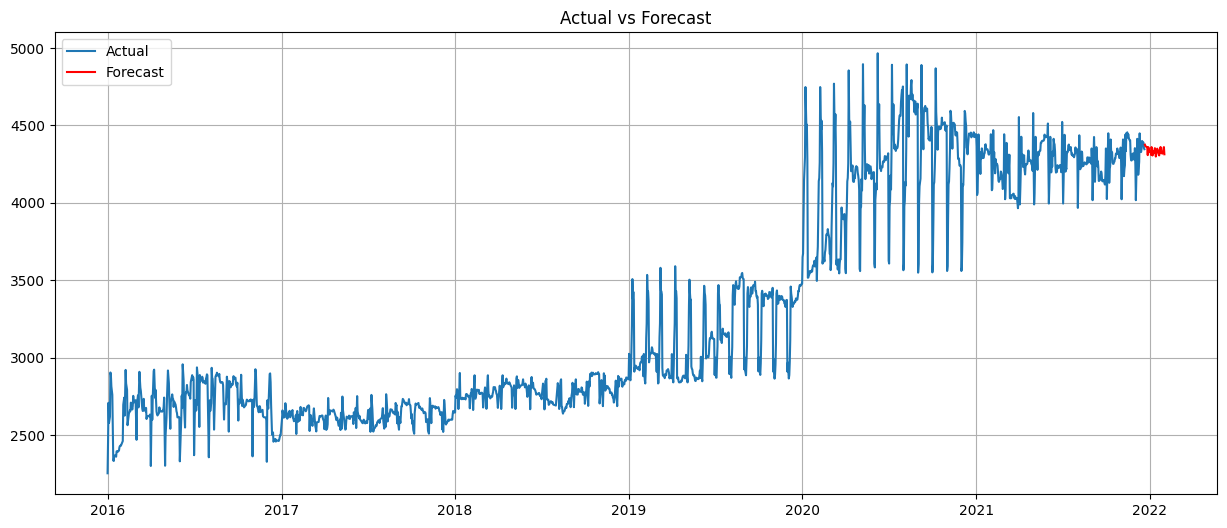

In [31]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(df_price, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

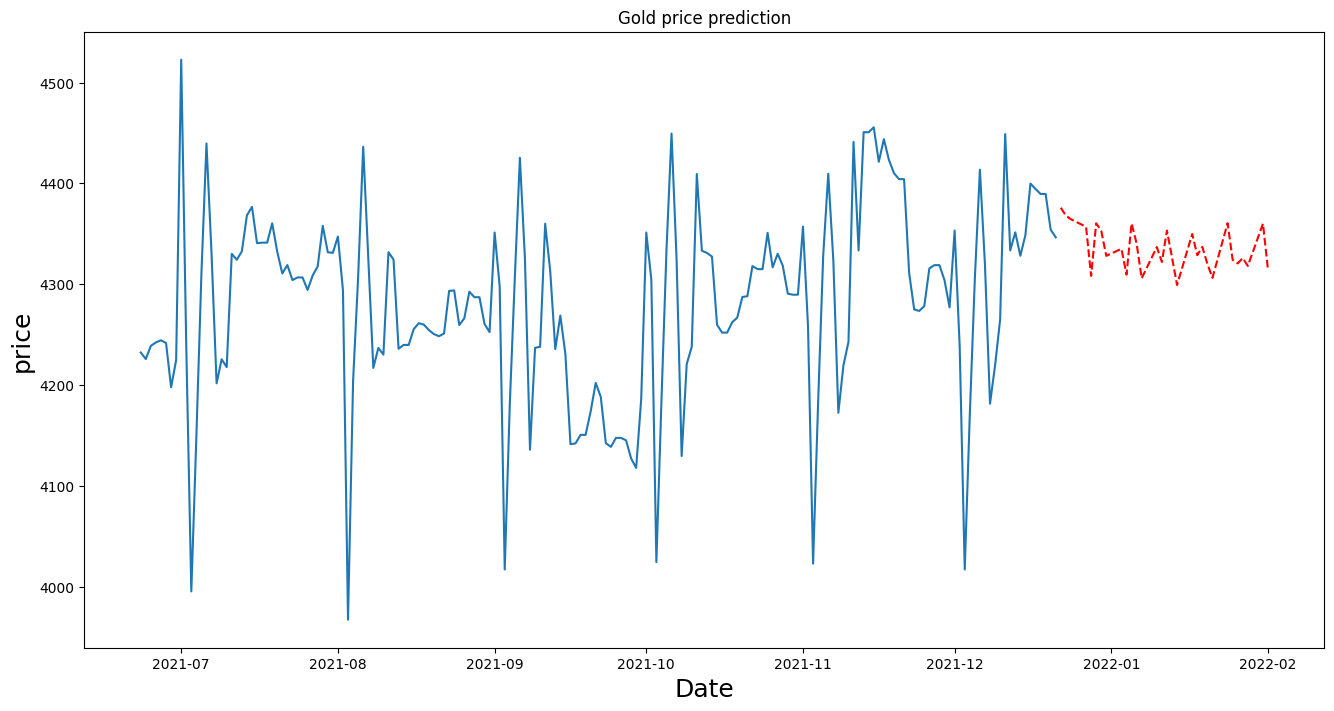

In [32]:
plt.figure(figsize=(16,8))
plt.title('Gold price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price' ,fontsize=18)
plt.plot(df['price'][2000:])
plt.plot(data_forecast[['price']],"r--")

# Deployment

In [33]:
from pickle import dump

In [34]:
dump(arima_fit_final,open('arima_fit_final.sav','wb'))

In [35]:
dump(df_price,open('df_price.sav','wb'))
dump(datetime,open('datetime.sav','wb'))